In [60]:
import os
import time
from random import random
import tweepy as tp
import jsonpickle

import sys
import string
import re
import us
import simplejson
from twython import Twython
import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime
from dateutil import parser as dateparser
import time

In [61]:
#CampaignFinBot
consumer_key = '0mErj1LvShLXydLXQoujly1sl'
consumer_secret = 'OHxc2TwHkaNfq6kDByhnNXqZG4Z9VZ3iS7H3IlaMe9uIjk0W3s'
access_token = '974349318156152832-7OaP8AOzVAzwvc41ZfZZuIS3A8ttPss'
access_secret = 'jhEEFtRWT19snQkcqhiS1Y4v7fDEUAOG4JqQliCRMgHuz'

#Jamie's
# consumer_key = 'D44YmpJEtFioaZkYmXWJ8hwc8'
# consumer_secret = 'LekWYdSHt2XJ5yr7HOEK7i560kqhWDVXzuxesdJr9rLgwtr5SF'
# access_token = '51341945-pgnokFwr0dQrlVXfiAgdxceW3rJiZxr0AO02ildib'
# access_secret = 'RLAVqW3sF7nTaBWhAetxC5VagMvxNsbsZiCt1nHuq01it'



In [62]:
# login to twitter account api
auth = tp.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tp.API(auth)


In [63]:
searchQuery = 'place:96683cc9126741d1 #marchforourlives'

In [64]:
#Maximum number of tweets we want to collect 
maxTweets = 1
#The twitter Search API allows up to 100 tweets per query
tweetsPerQry = 1

In [65]:
tweetCount = 0

#Open a text file to save the tweets to
with open('PoGo_USA_Tutorial.json', 'w') as f:

    #Tell the Cursor method that we want to use the Search API (api.search)
    #Also tell Cursor our query, and the maximum number of tweets to return
    for tweet in tp.Cursor(api.search,q=searchQuery).items(maxTweets) :         

        #Verify the tweet has place info before writing (It should, if it got past our place filter)
        if tweet.place is not None:
            
            #Write the JSON format to the text file, and add one to the number of tweets we've collected
            newTweet = jsonpickle.encode(tweet._json, unpicklable=False)
            tweetCount += 1

    #Display how many tweets we have collected
    print("Downloaded {0} tweets".format(tweetCount))
#     print(tweet)

Downloaded 1 tweets


In [66]:
print(tweet.place.full_name)

Houston, TX


In [67]:
location = tweet.place.full_name
location = location.split(',')
location = ''.join(location)
location = location.strip()
location


'Houston TX'

In [68]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}


In [69]:
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY", 
          "Alabama","Alaska","Arizona","Arkansas","California","Colorado",
          "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
          "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
          "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
          "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
          "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
          "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
          "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]


for n in range(0,len(states)) :
        if states[n] in location:
            location = states[n]
            print('location: ' + location)
            
# us_state_abbrev[location]

location: TX


In [70]:
print(location)

TX


In [71]:
tweetId = tweet.user.screen_name
print(tweetId)

houstonstyle


In [72]:
print(tweet.user.name)

Houston Style


In [73]:
#Insert status generated from our open source library and the location of the tweet.
status = 'Hi ' + tweet.user.name +'. I noticed you were interested in the 2nd ammendment. Heres some donation history from last year from the legislators in your state'

# Open Secrets API Call

In [74]:
from crpapi import CRP, CRPApiError
CRP.apikey = '4e8bab71c22740d56e73b43835f42def'

STATE = location
legislator = CRP.getLegislators.get(id=STATE)

#number of legislators in that specific state
print(len(legislator))

http://www.opensecrets.org/api/?method=getLegislators&output=json&apikey=4e8bab71c22740d56e73b43835f42def&id=TX
38


In [75]:
import numpy as np

def obtain_legislator(lastname=None):
    state_legislators = []
    
    for n in range(len(legislator)):
        name = legislator[n]['@attributes']['firstlast']
        cid = legislator[n]['@attributes']['cid']
        party = legislator[n]['@attributes']['party']
        state_legislators.append([name, cid, party])
        #print('Polititian: ' + name + ' , ' + 'CID: ' + cid + ' , ' + 'Party: ' + party)
    
    return state_legislators

state_legislators = obtain_legislator()


In [76]:
state_legislators = np.array(state_legislators)
state_legislators[:]

array([['Louis B Gohmert Jr.', 'N00026148', 'R'],
       ['Ted Poe', 'N00026457', 'R'],
       ['Sam Johnson', 'N00008028', 'R'],
       ['John Lee Ratcliffe', 'N00035972', 'R'],
       ['Jeb Hensarling', 'N00024922', 'R'],
       ['Joe Barton', 'N00005656', 'R'],
       ['John Culberson', 'N00009738', 'R'],
       ['Kevin Brady', 'N00005883', 'R'],
       ['Al Green', 'N00026686', 'D'],
       ['Michael McCaul', 'N00026460', 'R'],
       ['Mike Conaway', 'N00026041', 'R'],
       ['Kay Granger', 'N00008799', 'R'],
       ['Mac Thornberry', 'N00006052', 'R'],
       ['Randy Weber', 'N00033539', 'R'],
       ['Vicente Gonzalez', 'N00038809', 'D'],
       ["Beto O'Rourke", 'N00033540', 'D'],
       ['Bill Flores', 'N00031545', 'R'],
       ['Sheila Jackson Lee', 'N00005818', 'D'],
       ['Jodey Arrington', 'N00038285', 'R'],
       ['Joaquin Castro', 'N00033316', 'D'],
       ['Lamar Smith', 'N00001811', 'R'],
       ['Pete Olson', 'N00029285', 'R'],
       ['Will Hurd', 'N00031417', 'R

In [77]:
def obtain_industry(state_legislators, cycle='2016', ind='Q13'):
    donations_by_industry = []
    for index, candidate in enumerate(state_legislators[:,1]):
        try:
            candidate_name = state_legislators[:,0][index]
            total_donations = CRP.candIndByInd.get(cid=candidate, cycle=cycle, ind=ind)['total']
            donations_by_industry.append([candidate_name, total_donations])
            print('Legislator ' + candidate_name + ' has received ' + total_donations + ' from donors affiliated with this industry: ' + ind)
        except:
            candidate_name = state_legislators[:,0][index]
            donations_by_industry.append([candidate_name, 0])
            print('Legislator ' + candidate_name + ' is not affiliated with this industry: ' + ind)
    return donations_by_industry
    
donations_by_industry_Q13 = obtain_industry(state_legislators, '2016', 'Q13')

http://www.opensecrets.org/api/?method=CandIndByInd&output=json&apikey=4e8bab71c22740d56e73b43835f42def&cid=N00026148&cycle=2016&ind=Q13
Legislator Louis B Gohmert Jr. has received 7444 from donors affiliated with this industry: Q13
http://www.opensecrets.org/api/?method=CandIndByInd&output=json&apikey=4e8bab71c22740d56e73b43835f42def&cid=N00026457&cycle=2016&ind=Q13
Legislator Ted Poe has received 6250 from donors affiliated with this industry: Q13
http://www.opensecrets.org/api/?method=CandIndByInd&output=json&apikey=4e8bab71c22740d56e73b43835f42def&cid=N00008028&cycle=2016&ind=Q13
Legislator Sam Johnson has received 2750 from donors affiliated with this industry: Q13
http://www.opensecrets.org/api/?method=CandIndByInd&output=json&apikey=4e8bab71c22740d56e73b43835f42def&cid=N00035972&cycle=2016&ind=Q13
Legislator John Lee Ratcliffe has received 4500 from donors affiliated with this industry: Q13
http://www.opensecrets.org/api/?method=CandIndByInd&output=json&apikey=4e8bab71c22740d56e

Legislator Ted Cruz has received 362103 from donors affiliated with this industry: Q13


In [78]:
donations_by_industry_Q13 = np.array(donations_by_industry_Q13)
donations_by_industry_Q12 = obtain_industry(state_legislators, cycle='2016', ind='Q12')
donations_by_industry_Q12 = np.array(donations_by_industry_Q12)


http://www.opensecrets.org/api/?method=CandIndByInd&output=json&apikey=4e8bab71c22740d56e73b43835f42def&cid=N00026148&cycle=2016&ind=Q12
Legislator Louis B Gohmert Jr. is not affiliated with this industry: Q12
http://www.opensecrets.org/api/?method=CandIndByInd&output=json&apikey=4e8bab71c22740d56e73b43835f42def&cid=N00026457&cycle=2016&ind=Q12
Legislator Ted Poe is not affiliated with this industry: Q12
http://www.opensecrets.org/api/?method=CandIndByInd&output=json&apikey=4e8bab71c22740d56e73b43835f42def&cid=N00008028&cycle=2016&ind=Q12
Legislator Sam Johnson is not affiliated with this industry: Q12
http://www.opensecrets.org/api/?method=CandIndByInd&output=json&apikey=4e8bab71c22740d56e73b43835f42def&cid=N00035972&cycle=2016&ind=Q12
Legislator John Lee Ratcliffe is not affiliated with this industry: Q12
http://www.opensecrets.org/api/?method=CandIndByInd&output=json&apikey=4e8bab71c22740d56e73b43835f42def&cid=N00024922&cycle=2016&ind=Q12
Legislator Jeb Hensarling is not affiliated 

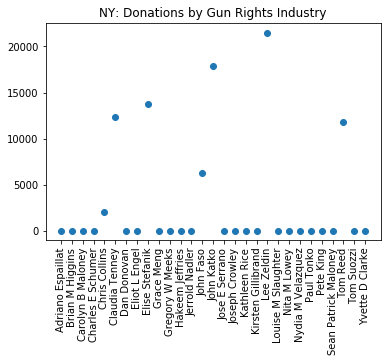

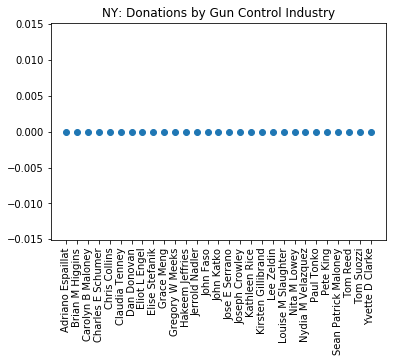

In [113]:
import matplotlib.pyplot as plt 

def make_graphs(donations_by_industry, title):
#     candidate_names = donations_by_industry[:,0]
#     donations_received = donations_by_industry[:,1]
    candidate_names, donations_received = zip(*donations_by_industry)
    donations_received = list(map(int, donations_received))
    plt.scatter(candidate_names, donations_received)
    plt.xticks(rotation=90)
    plt.title(title)
    plt.savefig(title + '.png')
    plt.show()

make_graphs(donations_by_industry_Q13, location + ': Donations by Gun Rights Industry')
make_graphs(donations_by_industry_Q12, location + ': Donations by Gun Control Industry')

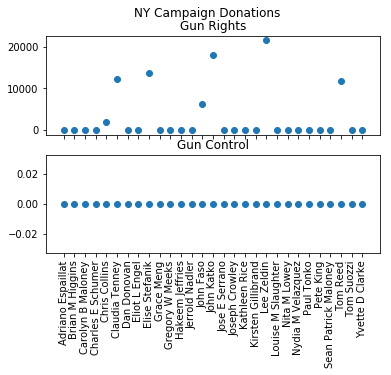

In [114]:
import matplotlib.pyplot as plt 

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle(location + ' Campaign Donations')

candidate_names1, donations_received1 = zip(*donations_by_industry_Q13)
donations_received1 = list(map(int, donations_received1))
ax1.scatter(candidate_names1, donations_received1)
ax1.set_title('Gun Rights')

candidate_names2, donations_received2 = zip(*donations_by_industry_Q12)
donations_received2 = list(map(int, donations_received2))
ax2.scatter(candidate_names2, donations_received2)
ax2.set_title('Gun Control')


for ax in f.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=90)

plt.show()
plt.savefig('twitter_fig.png')

# Reply to tweet

In [80]:
#Reply to tweet
#Uses UserName and Status Input
reply_status = "@%s %s" % (tweetId, status)
api.update_with_media('Donations by Gun Rights Industry.png', status=reply_status, in_reply_to_status=tweet.id)

Status(_api=<tweepy.api.API object at 0x109fd5400>, _json={'created_at': 'Mon Mar 26 14:00:40 +0000 2018', 'id': 978270513347858432, 'id_str': '978270513347858432', 'text': '@houstonstyle Hi Houston Style. I noticed you were interested in the 2nd ammendment. Heres some donation history fr… https://t.co/pz4FnGGdtX', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'houstonstyle', 'name': 'Houston Style', 'id': 29493760, 'id_str': '29493760', 'indices': [0, 13]}], 'urls': [{'url': 'https://t.co/pz4FnGGdtX', 'expanded_url': 'https://twitter.com/i/web/status/978270513347858432', 'display_url': 'twitter.com/i/web/status/9…', 'indices': [117, 140]}]}, 'source': '<a href="https://willdavis.fyi" rel="nofollow">Campaign Contributions</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': 29493760, 'in_reply_to_user_id_str': '29493760', 'in_reply_to_screen_name': 'houstonstyle', 'user': {'id': 974349318156152

In [81]:
api.update_with_media('Donations by Gun Control Industry.png', in_reply_to_status=tweet.id)

Status(_api=<tweepy.api.API object at 0x109fd5400>, _json={'created_at': 'Mon Mar 26 14:00:41 +0000 2018', 'id': 978270519807143936, 'id_str': '978270519807143936', 'text': 'https://t.co/XicB4LHWvE', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 978270517668057088, 'id_str': '978270517668057088', 'indices': [0, 23], 'media_url': 'http://pbs.twimg.com/media/DZOD2kvXkAA7rDq.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DZOD2kvXkAA7rDq.jpg', 'url': 'https://t.co/XicB4LHWvE', 'display_url': 'pic.twitter.com/XicB4LHWvE', 'expanded_url': 'https://twitter.com/campaignfinbot/status/978270519807143936/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 432, 'h': 288, 'resize': 'fit'}, 'small': {'w': 432, 'h': 288, 'resize': 'fit'}, 'medium': {'w': 432, 'h': 288, 'resize': 'fit'}}}]}, 'extended_entities': {'media': [{'id': 978270517668057088, 'id_str': '978270517668057088'